# Assignment 2 - Solving two 1D problems

### Part 1: Solving a wave problem with sparse matrices

In [1]:
# modules

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
import timeit as timeit

In [2]:
from scipy.sparse import coo_matrix

In [ ]:
# Creating the wave equation function 

def wave_equation_solution(N):

    rows = []
    columns = []
    data = []


    # Constant k 
    k = (29*np.pi)/2


    # setting values for diagonals and off diagonals
    diagonal = (2-((k**2)/(N**2))) # if i == j 
    off_diagonal = -1              # if j == i + 1 or j == i - 1



    # Setting values of vector f

    f = np.zeros(N+1, dtype=np.float64)
    
    # Boundary conditions for f
    f[0] = 0
    f[N] = 1

    for i in range(N+1):

    
        # setting i==0, i==N to 1
        if i==0 or i==N:
            rows.append(i)
            columns.append(i)
            data.append(1)

        
        # Calculating remaining points using given conditions
        else:
            
            # for diagonals
            rows.append(i)
            columns.append(i)
            data.append(diagonal)
        

            # for j=i-1, and to keep within matrix bound
            if i>0:
                rows.append(i)
                columns.append(i-1)
                data.append(off_diagonal)

            # for j=i+1, and to keep within matrix bound
            if i<N:
                rows.append(i)
                columns.append(i+1)
                data.append(off_diagonal)
            


    row_ind = np.array(rows)
    col_ind = np.array(columns)
    data = np.array(data)
    return coo_matrix((data, (row_ind, col_ind)), shape=(N+1, N+1)).tocsr(), f

In [116]:
# Testing my function

A,f = wave_equation_solution(4)
print(A.toarray())

[[   1.      0.      0.      0.      0.  ]
 [  -1.   -127.69   -1.      0.      0.  ]
 [   0.     -1.   -127.69   -1.      0.  ]
 [   0.      0.     -1.   -127.69   -1.  ]
 [   0.      0.      0.      0.      1.  ]]


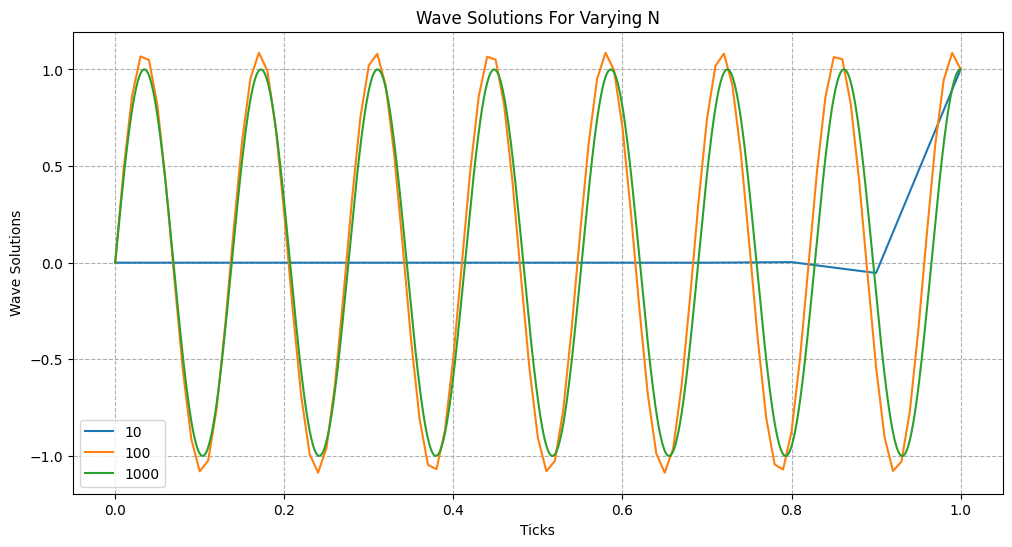

In [ ]:
# Creating a plotting function 

def plotting_waves(): 
    N = [10,100,1000]

    plt.figure(figsize=(12, 6))

    for n in N:
        # Solving using spsolve() and plotting within loop to generate 3 graphs 
        A, f = wave_equation_solution(n)
        u = spsolve(A,f)
        x= np.linspace(0, 1, n+1)
        plt.plot(x,u,label=f"{n}")


    # Plot initialisation
    plt.grid(True,which="both", linestyle = "--")
    plt.title("Wave Solutions For Varying N")
    plt.xlabel("Ticks")
    plt.ylabel("Wave Solutions")
    plt.legend()
    plt.show()

plotting_waves()

The wave equation solution should be a sinusoidal solution. As you increase N, the plots become more and more smooth and sinusoidal, so I would expect N=1000 to be the closest to the actual solution of the wave function.

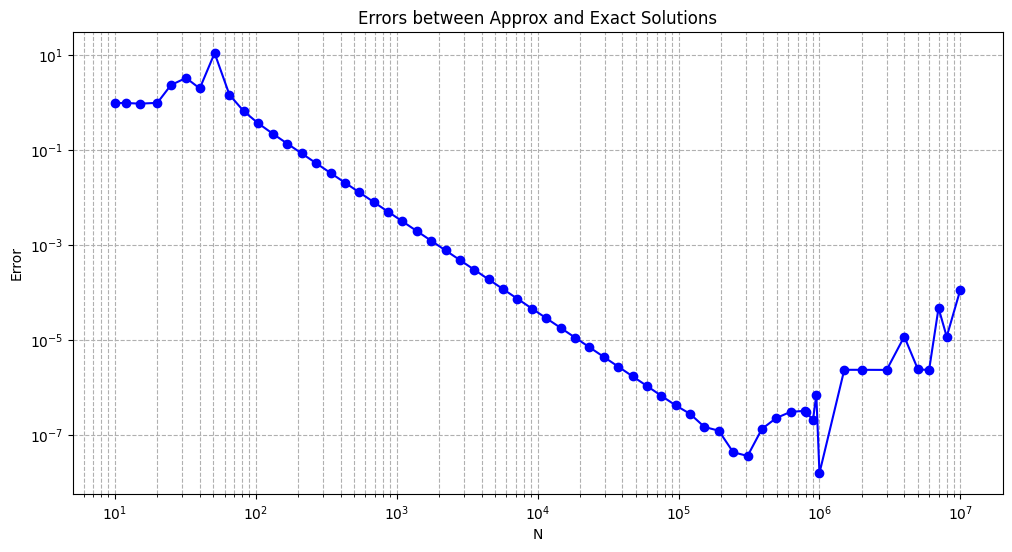

In [ ]:
# Plotting approx errors

def plotting_errors():
    N = [10, 12, 15, 20, 25, 32, 40, 51, 65, 82, 104, 132, 167, 212, 268, 339, 429, 542, 686, 868, 1098, 1389, 1757, 2222, 2811, 3556, 4498, 5689, 7196, 9102, 11513, 14563, 18420, 23299, 29470, 37275, 47148, 59636, 75431, 95409, 120679, 152641, 193069, 244205, 308884, 390693, 494171, 625055, 790604, 800000, 900000, 950000, 1000000, 1500000, 2000000, 3000000, 4000000,5000000,6000000,7000000,8000000,10000000]
    errors = []

    for n in N:
        # Solving using spsolve(), inputting given error equation
        A, f = wave_equation_solution(n)
        u = spsolve(A,f)

        x = np.linspace(0, 1, n+1)
        k = (29*np.pi)/2

        u_exact = np.sin(k*x)

        approx_error = max(abs(u-u_exact))
        errors.append(approx_error)
        
    # Plot initialisation
    plt.figure(figsize=(12, 6))

    plt.loglog(N,errors, "b", marker="o")
    plt.title("Errors between Approx and Exact Solutions")
    plt.xlabel("N")
    plt.ylabel("Error")
    plt.grid(True,which="both", linestyle = "--")
    

    return plt.show()

plotting_errors()

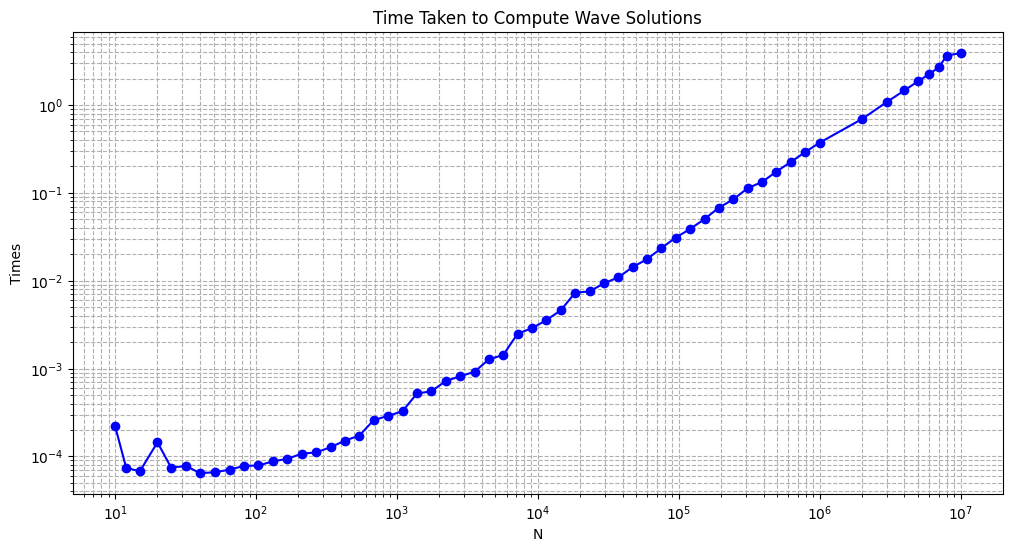

In [ ]:
def plotting_times():
    times = []
    N = [10, 12, 15, 20, 25, 32, 40, 51, 65, 82, 104, 132, 167, 212, 268, 339, 429, 542, 686, 868, 1098, 1389, 1757, 2222, 2811, 3556, 4498, 5689, 7196, 9102, 11513, 14563, 18420, 23299, 29470, 37275, 47148, 59636, 75431, 95409, 120679, 152641, 193069, 244205, 308884, 390693, 494171, 625055, 790604, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,10000000]


    for n in N:
        # Solving using spsolve() and timing using timeit(), done in loop for each N value
        A, f = wave_equation_solution(n)
        t = %timeit -o -q -n1 -r1 spsolve(A,f)
        times.append(t.average)

    # Plot initialisation
    plt.figure(figsize=(12, 6))
    plt.grid(True,which="both", linestyle = "--")
    plt.title("Time Taken to Compute Wave Solutions")

    plt.loglog(N,times, "b", marker="o")
    plt.xlabel("N")
    plt.ylabel("Times")

    plt.show()

plotting_times()

I chose N=1,000,000 for my prediction of an error which is $10^{-8}$. My chosen value was a minimum in the errors on the graph titled "Errors between Approx and Exact Solutions". From the graph "Time Taken to Compute Wave Solutions", N=1,000,000 should take around 0.5s.

**Prediction: 1,000,000  ||  Computation Time Prediction: 0.5s**


In [ ]:
# Calculation of solution for N=1,000,000

def solution_and_error(N):
        # Solving using spsolve()
        A,f = wave_equation_solution(N)
        u = spsolve(A,f)

        # Calculating magnitude of solution u
        u_mag = np.linalg.norm(u)

        # Timing function
        t = %timeit -o -q -n1 -r1 spsolve(A,f)
        
        # Solving exact solution to find error
        x = np.linspace(0, 1, N+1)
        k = (29*np.pi)/2
        u_exact = np.sin(k*x)

        approx_error = max(abs(u-u_exact))

        print(f"Magnitude of solution: {np.round(u_mag,3)}. \nError: {approx_error}. \nComputation Time: {t}s.")


my_prediction = 1000000
solution_and_error(my_prediction)

Magnitude of solution: 707.107. 
Error: 1.5517885523438912e-08. 
Computation Time: 369 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)s.


Both the Error and computation time were roughly as predicted, with the error being approximately $10^{-8}$, and the time to compute being 0.3s.

### Part 2: Solving the heat equation with GPU acceleration

In [145]:
# Creating heat equation solving function

def heat_equation_solution(N,T):

    # N is no. spatial steps
    # T is total no. time steps 
    
    # Setting h value
    h = 1/N

    # Setting u, spatial aspect is ith row and time aspect is jth column
    u = np.zeros((N+1,T+1),dtype=np.float64)
    # Boundary conditions
    u[0,0] = 10
    u[N,0] = 10


    for j in range(T):
        # Boundary conditions for later values of time for i=0, i=N
        u[0,j+1] = 10
        u[N,j+1] = 10
        
        for i in range(1,N):
            # Ensuring t != 0 and calculating given iteration equation
            if j>0:
                u[i,j+1] = u[i,j]+((u[i-1,j]-2*u[i,j]+u[i+1,j])/(1000*h))

    return u

In [146]:
heat_equation_solution(5,5)

array([[10.  , 10.  , 10.  , 10.  , 10.  , 10.  ],
       [ 0.  ,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ],
       [10.  , 10.  , 10.  , 10.  , 10.  , 10.  ]])

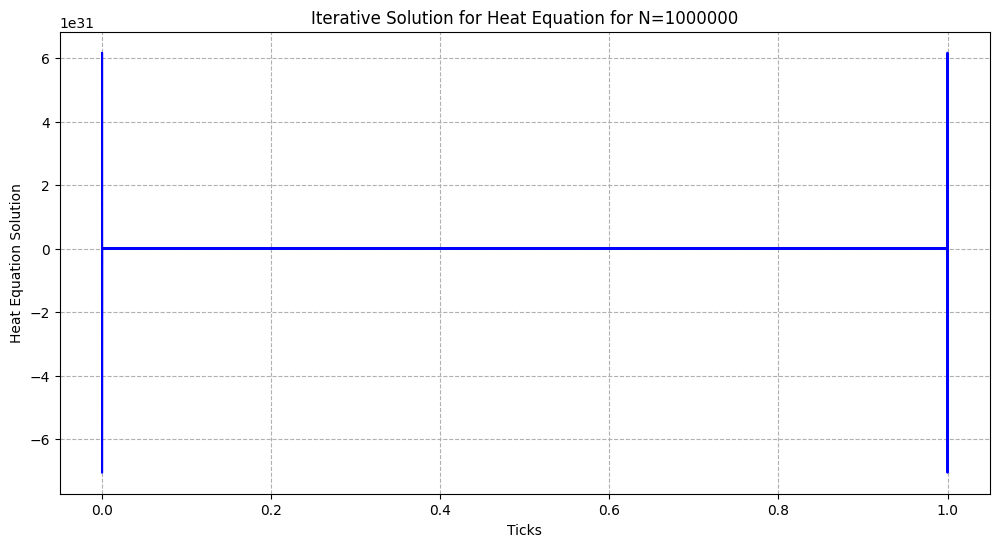

In [147]:
def plotting_heat_solution(N): 
    run_time = [1,2,10]
    

    plt.figure(figsize=(12, 6))

    for t in run_time:
        v = heat_equation_solution(N,t)
        x = np.linspace(0, 1, N+1)
        plt.plot(x,v,"b",label=f"{t}")

    plt.grid(True,which="both", linestyle = "--")
    plt.title(f"Iterative Solution for Heat Equation for N={N}")
    plt.xlabel("Ticks")
    plt.ylabel("Heat Equation Solution")
    plt.show()

plotting_heat_solution(1000000)

The higher the value of N (similarly to part 1 of the assignment), the more accurate the iterative method becomes. I chose a value of N=1,000,000, and the function looks as expected: "on" at 0,1 and "off" elsewhere.

In [144]:
# CUDA and math import

from numba import cuda
import math
cuda.detect()

Found 1 CUDA devices
id 0    b'NVIDIA GeForce RTX 3060'                              [SUPPORTED]
                      Compute Capability: 8.6
                           PCI Device ID: 0
                              PCI Bus ID: 6
                                    UUID: GPU-fe586a54-9468-96e1-0e19-a1fa5d63a734
                                Watchdog: Enabled
                            Compute Mode: WDDM
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported


True

In [ ]:
# CUDA implementation

@cuda.jit(device=True)
def heat_equation_cuda(N,T,u):

    # N is no. spatial steps
    # T is total no. time steps 
    # u is the resultant solution from heat_equation_solution() function.
    
    # Setting h value
    h = 1/N





    # Setting up block and grid sizes. 
    blockdim = 256
    griddim = math.ceil(N/blockdim)


cuda.synchronize()

